In [1]:
import pandas as pd
import numpy as np

CULTURE = pd.read_csv('lv2-2407.csv')
print(CULTURE.shape)
print(CULTURE.info())

(1524, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 11 columns):
C_ID             1524 non-null int64
NEMP             1524 non-null int64
NEMP_PER_HEAD    1524 non-null float64
INT_RATIO        1524 non-null int64
F_RATIO          1524 non-null int64
S1               1524 non-null float64
S2               1524 non-null float64
S3               1524 non-null float64
S4               1524 non-null float64
S5               1524 non-null float64
SCORE            1524 non-null float64
dtypes: float64(7), int64(4)
memory usage: 131.1 KB
None


In [2]:
CULTURE

,C_ID,NEMP,NEMP_PER_HEAD,INT_RATIO,F_RATIO,S1,S2,S3,S4,S5,SCORE
0,1,20965,10.6,42,48,92.3,99.7,99.0,74.9,96.2,96.40
1,2,21887,9.6,25,50,94.8,99.0,99.3,49.5,80.5,95.20
2,3,20185,11.3,39,47,90.9,99.5,97.0,54.2,95.8,94.80
3,4,16164,7.1,24,46,94.2,96.7,99.8,65.0,79.8,94.80
4,5,11415,8.2,33,40,90.7,93.6,99.8,90.9,89.3,94.20
...,...,...,...,...,...,...,...,...,...,...,...
1519,1520,23657,20.3,6,35,17.9,16.0,14.9,45.5,27.3,14.35
1520,1521,10724,11.1,7,38,21.3,12.3,13.9,43.8,30.4,14.35
1521,1522,38649,13.2,1,39,17.2,10.9,18.3,46.9,17.0,14.35
1522,1523,17038,28.2,5,55,18.8,12.2,10.5,65.7,29.6,14.35


### Q1

#### Step 1-1

In [3]:
df4 = CULTURE.copy()

VAR241 = df4.columns[1:4].tolist() + df4.columns[5:].tolist()
print(VAR241)
cv = []
for i in range(len(VAR241)):
    sd = df4[VAR241[i]].std()
    mean = df4[VAR241[i]].mean()
    cv.append(sd / mean)
cv

['NEMP', 'NEMP_PER_HEAD', 'INT_RATIO', 'S1', 'S2', 'S3', 'S4', 'S5', 'SCORE']


[0.7370618875840848,
 0.5238290399400145,
 1.168639328294814,
 0.4905155421227808,
 0.7291352271443924,
 0.5675360208579083,
 0.3065498676138587,
 0.47797966957986976,
 0.4698529953171055]

#### Step 1-2

In [4]:
from scipy.stats import skew

VAR242 = df4.columns[1:4].tolist() + df4.columns[5:].tolist()
print(VAR242)
sk = []
for i in range(len(VAR242)):
    sk.append(skew(df4[VAR242[i]]))
sk

['NEMP', 'NEMP_PER_HEAD', 'INT_RATIO', 'S1', 'S2', 'S3', 'S4', 'S5', 'SCORE']


[1.382390192457803,
 2.104192820506278,
 1.9998139075029493,
 2.158611057085938,
 2.0900346437886457,
 0.1941583021679285,
 2.1722158194776,
 0.7139848373283906,
 1.0320953973736156]

#### Step 1-3

In [5]:
VAR243 = df4.columns[1:4].tolist() + df4.columns[5:].tolist()
print(VAR243)
cor = df4[VAR243].corr()['SCORE'].tolist()[:-1]
cor

['NEMP', 'NEMP_PER_HEAD', 'INT_RATIO', 'S1', 'S2', 'S3', 'S4', 'S5', 'SCORE']


[0.0803963391413352,
 -0.039742927972600595,
 0.5571226792404963,
 0.8102424597188804,
 0.8612470921614193,
 0.8535500298348522,
 0.42487147157165583,
 0.6341395520101895]

#### Step 1-4

In [6]:
res24 = max(cv) + min(sk) + max(cor)
print(res24)

ans24 = round(res24, 3)
print(ans24)

2.2240447226241615
2.224


### Q2

#### Step 2-1

In [7]:
df5 = CULTURE.copy()

df25 = df5[df5['F_RATIO'] != -999]
df25.shape

(1466, 11)

#### Step 2-2

In [8]:
from sklearn.preprocessing import StandardScaler

VAR25 = df5.columns[1:-1]
print(VAR25)
VAR25s = [i+'_S' for i in VAR25]
df252 = pd.DataFrame(StandardScaler().fit_transform(df25[VAR25]),columns=VAR25s)
df252

Index(['NEMP', 'NEMP_PER_HEAD', 'INT_RATIO', 'F_RATIO', 'S1', 'S2', 'S3', 'S4',
       'S5'],
      dtype='object')


,NEMP_S,NEMP_PER_HEAD_S,INT_RATIO_S,F_RATIO_S,S1_S,S2_S,S3_S,S4_S,S5_S
0,0.045785,-0.813352,2.714871,-0.224625,5.160761,4.844856,1.853440,2.173504,2.290136
1,0.106671,-0.917010,1.271858,-0.066649,5.356333,4.801227,1.864341,0.291133,1.574647
2,-0.005724,-0.740791,2.460222,-0.303612,5.051240,4.832391,1.780768,0.639446,2.271907
3,-0.271258,-1.176157,1.186974,-0.382600,5.309396,4.657875,1.882509,1.439824,1.542746
4,-0.584867,-1.062132,1.950923,-0.856527,5.035594,4.464661,1.882509,3.359250,1.975685
...,...,...,...,...,...,...,...,...,...
1461,0.223556,0.192136,-0.340922,-1.251465,-0.659483,-0.371922,-1.202441,-0.005303,-0.849813
1462,-0.630498,-0.761523,-0.256039,-1.014502,-0.393504,-0.602532,-1.238777,-0.131288,-0.708538
1463,1.213580,-0.543840,-0.765338,-0.935514,-0.714243,-0.689790,-1.078898,0.098450,-1.319211
1464,-0.213542,1.011038,-0.425805,0.328289,-0.589077,-0.608765,-1.362321,1.491701,-0.744996


#### Step 2-3, 2-4

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

ks = [2,3,4]
max_sil = 0
max_clst = ''
for k in ks:
    df252['clst'+str(k)] = KMeans(n_clusters=k, random_state=1234).fit_predict(df252[VAR25s])
    temp_sil = silhouette_score(df252[VAR25s], df252['clst'+str(k)])
    print(k,':',temp_sil)
    if temp_sil > max_sil:
        max_sil = temp_sil
        max_clst = 'clst'+str(k)
print('max:',max_clst,'\n')

print(df252.groupby(max_clst)[max_clst].count())

2 : 0.3140819970740654
3 : 0.2210919851398328
4 : 0.18247275828119527
max: clst2 

clst2
0    1087
1     379
Name: clst2, dtype: int64


In [10]:
ans25 = df252.groupby(max_clst)[max_clst].count().max()
print(ans25)

1087


### Q3

#### Step 3-1

<AxesSubplot:>

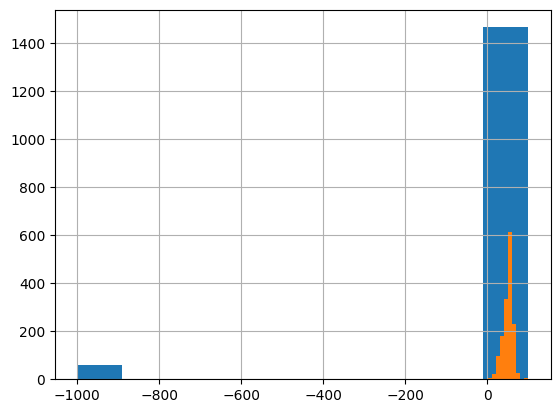

In [11]:
df6 = CULTURE.copy()

df6['F_RATIO'].hist()
fratio_re = df6[df6['F_RATIO'] != -999]['F_RATIO'].mean()
df6['F_RATIO'] = df6['F_RATIO'].apply(lambda x: fratio_re if x == -999 else x)
df6['F_RATIO'].hist()

#### Step 3-2

In [12]:
TRAIN26 = df6[df6['C_ID'] % 5 != 0]
TEST26 = df6[df6['C_ID'] % 5 == 0]
print(TRAIN26.shape, TEST26.shape)

(1220, 11) (304, 11)


#### Step 3-3

In [13]:
from sklearn.linear_model import LinearRegression

VAR26 = TRAIN26.columns[1:-1]
print(VAR26)
LR = LinearRegression().fit(TRAIN26[VAR26], TRAIN26['SCORE'])

Index(['NEMP', 'NEMP_PER_HEAD', 'INT_RATIO', 'F_RATIO', 'S1', 'S2', 'S3', 'S4',
       'S5'],
      dtype='object')


#### Step 3-4

In [14]:
coef = LR.coef_
print(coef)
NUM26_A = abs(coef).max()
print(NUM26_A)

[ 3.43113816e-07 -4.20879496e-04 -3.89422707e-03 -4.23525525e-03
  2.93774952e-01  3.04243435e-01  3.01783872e-01  2.31424662e-02
  7.97170950e-02]
0.3042434348882814


#### Step 3-5

In [15]:
pred6 = LR.predict(TEST26[VAR26])
MAPE = abs((pred6 - TEST26['SCORE']) / TEST26['SCORE']).mean() * 100
NUM26_B = MAPE
print(NUM26_B)

5.233174583714299


In [16]:
res26 = NUM26_A + NUM26_B
print(res26)

ans26 = round(res26, 4)
print(ans26)

5.5374180186025805
5.5374


## Summary

In [17]:
print(ans24)
print(ans25)
print(ans26)

2.224
1087
5.5374
